<a href="https://colab.research.google.com/github/DannyNguyen24-Vietnam/ARIN_Course---Practice01---Week04/blob/main/ARIN_Course_Practice_Week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1bddf678ae1f463bada3f2370c5c404be10d76f8246f8c1cc99c33a120fa4c87
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [6]:
# Generate data (test)
x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50, 50, 60])

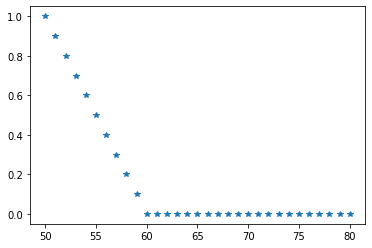

In [7]:
# Visualizing
plt.figure()
plt.plot(x, slow, '*', linewidth = 2, label = 'Slow')

In [23]:
# Generate data
medium   = fuzz.trimf(x, [50, 60, 70])
fast_med = fuzz.trimf(x, [60, 70, 80])
fast     = fuzz.trimf(x, [70, 80, 80])

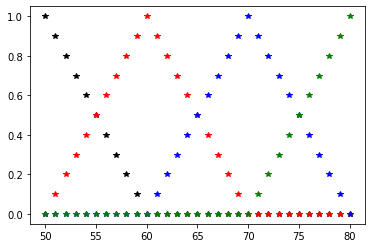

In [24]:
# Visualizing
plt.figure()
plt.plot(x, slow, 'k*', linewidth = 2, label = 'Slow')
plt.plot(x, medium, 'r*', linewidth = 2, label = 'Medium')
plt.plot(x, fast_med, 'b*', linewidth = 2, label = 'Fast Medium')
plt.plot(x, fast, 'g*', linewidth = 2, label = 'Fast')
plt.show()

In this section, a control system in restaurant tipping is presented

In [26]:
# Import tools
from skfuzzy import control as ctrl

In [27]:
# Generate data
food    = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip     = ctrl.Consequent(np.arange(10, 31, 10), 'tip')

In [35]:
# Create Membership Functions
food['poor'] = fuzz.trimf(food.universe, [0 , 0, 5])
food['average'] = fuzz.trimf(food.universe, [0 , 5, 10])
food['good'] = fuzz.trimf(food.universe, [5 , 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0 , 0, 5])
service['average'] = fuzz.trimf(service.universe, [0 , 5, 10])
service['good'] = fuzz.trimf(service.universe, [5 , 10, 10])

tip['least'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['quite'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])

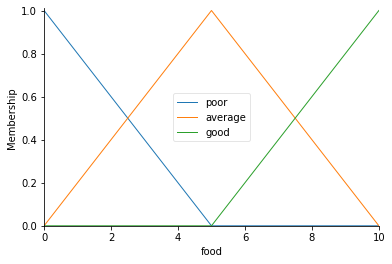

In [33]:
# Visualization
food.view()

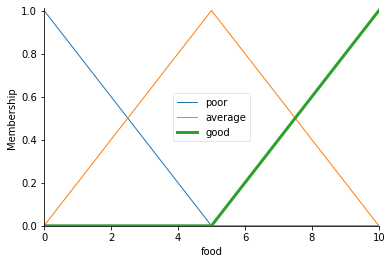

In [38]:
# Visualization
food['good'].view()

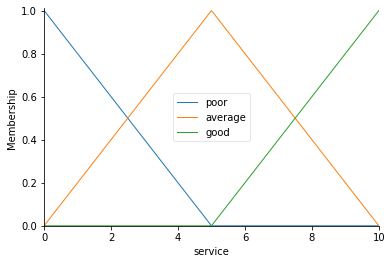

In [30]:
# Visualization
service.view()

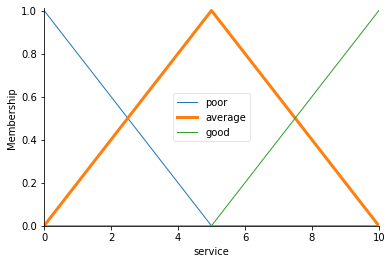

In [37]:
# Visualization
service['average'].view()

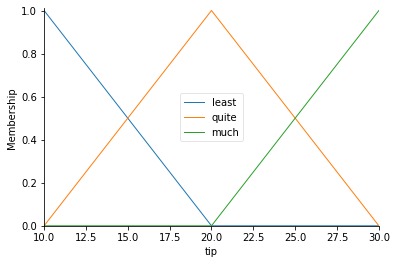

In [36]:
# Visualization
tip.view()

In [40]:
# Rules
rule_1 = ctrl.Rule(food['poor']&service['poor'], tip['least'])
rule_2 = ctrl.Rule(food['average']&service['poor'], tip['least'])
rule_3 = ctrl.Rule(food['good']&service['poor'], tip['quite'])

rule_4 = ctrl.Rule(food['poor']&service['average'], tip['least'])
rule_5 = ctrl.Rule(food['average']&service['average'], tip['quite'])
rule_6 = ctrl.Rule(food['good']&service['average'], tip['much'])

rule_7 = ctrl.Rule(food['poor']&service['good'], tip['quite'])
rule_8 = ctrl.Rule(food['average']&service['good'], tip['much'])
rule_9 = ctrl.Rule(food['good']&service['good'], tip['much'])

In [41]:
# Control system (simplest)
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3,
                                   rule_4, rule_5, rule_6,
                                   rule_7, rule_8, rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [42]:
# Test an instance
tipping.input['food'] = 6.45
tipping.input['service'] = 9.65
tipping.compute()

# Print
print("Predicted:", tipping.output['tip'])

Predicted: 24.880933345446838


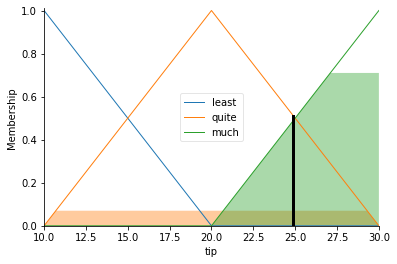

In [44]:
# Visualizing results
tip.view(sim = tipping)

Predicted: 26.16372808677008


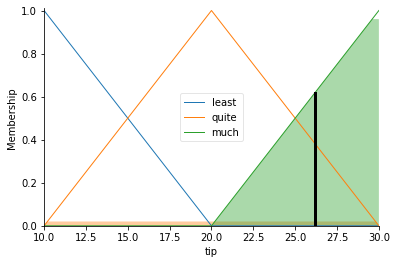

In [45]:
# Test an instance
tipping.input['food'] = 9.8
tipping.input['service'] = 9.9
tipping.compute()

# Print
print("Predicted:", tipping.output['tip'])

# Visualizing results
tip.view(sim = tipping)

Predicted: 14.963754125528752


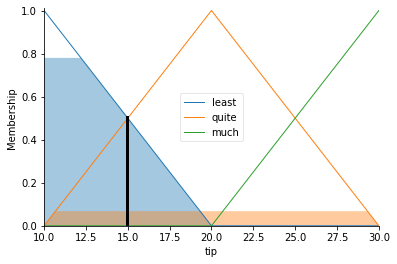

In [46]:
# Test an instance
tipping.input['food'] = 0.34
tipping.input['service'] = 1.1
tipping.compute()

# Print
print("Predicted:", tipping.output['tip'])

# Visualizing results
tip.view(sim = tipping)